In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
from keras.models import load_model
import os
import random
from keras.utils import np_utils 

Using TensorFlow backend.


In [2]:
#Lấy tất cả đường đẫn đến ảnh 
filenames=os.listdir(os.getcwd()+"\\data-digit")
print(filenames)
labels=[]
paths=[]
images=[]
for i in filenames:
    path=os.path.join(os.getcwd()+"\\data-digit",i)
    file_images=os.listdir(path)
    for j in file_images:
        image=os.path.join(path,j)
        images.append(image)
#Xáo trộn đường dẫn
random.shuffle(images)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [3]:
images

['C:\\Users\\quang\\Anaconda3\\envs\\gputest\\code\\IPS\\data-digit\\5\\25.JPG',
 'C:\\Users\\quang\\Anaconda3\\envs\\gputest\\code\\IPS\\data-digit\\8\\85 (67).JPG',
 'C:\\Users\\quang\\Anaconda3\\envs\\gputest\\code\\IPS\\data-digit\\7\\89 (68).JPG',
 'C:\\Users\\quang\\Anaconda3\\envs\\gputest\\code\\IPS\\data-digit\\5\\9 (23).JPG',
 'C:\\Users\\quang\\Anaconda3\\envs\\gputest\\code\\IPS\\data-digit\\8\\698.00.jpg',
 'C:\\Users\\quang\\Anaconda3\\envs\\gputest\\code\\IPS\\data-digit\\1\\19.JPG',
 'C:\\Users\\quang\\Anaconda3\\envs\\gputest\\code\\IPS\\data-digit\\5\\298.51.jpg',
 'C:\\Users\\quang\\Anaconda3\\envs\\gputest\\code\\IPS\\data-digit\\9\\85 (32).JPG',
 'C:\\Users\\quang\\Anaconda3\\envs\\gputest\\code\\IPS\\data-digit\\5\\50.JPG',
 'C:\\Users\\quang\\Anaconda3\\envs\\gputest\\code\\IPS\\data-digit\\5\\326.51.jpg',
 'C:\\Users\\quang\\Anaconda3\\envs\\gputest\\code\\IPS\\data-digit\\2\\11.JPG',
 'C:\\Users\\quang\\Anaconda3\\envs\\gputest\\code\\IPS\\data-digit\\7\\49.JPG

In [4]:
labels = [int(p.split(os.path.sep)[-2]) for p in images]
Labels = np_utils.to_categorical(labels, 10) 
print('Dữ liệu y ban đầu ', labels[1]) 
#one-hot encoding
print('Dữ liệu y sau one-hot encoding ',Labels[1])

Dữ liệu y ban đầu  8
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [7]:
a=[[2.1786249e-05 1.7680537e-05 4.7490647e-07 1.6085136e-04 9.5939336e-05
  4.4727427e-04 6.5482517e-08 9.7228018e-05 3.5164476e-04 9.9880707e-01]]

SyntaxError: invalid syntax (<ipython-input-7-632e97e3f7ac>, line 1)

(array([ 75.,  92., 136., 133., 107., 323., 126., 201., 137., 190.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

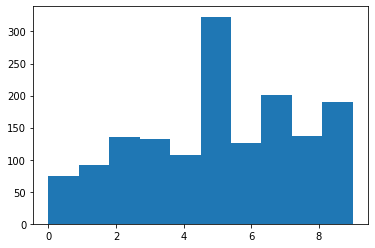

In [5]:
plt.hist(labels)

In [12]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
import cv2
Images = []
for (j, imagePath) in enumerate(images):
    img = cv2.imread(imagePath);
    h1, w1 = img.shape[:2]
    roi_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    roi_blur = cv2.GaussianBlur(roi_gray,(3,3),1)
    ret, thre = cv2.threshold(roi_blur,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    kerel3 = cv2.getStructuringElement(cv2.MORPH_RECT,(1,1))
    thre = cv2.morphologyEx(thre,cv2.MORPH_ERODE,kerel3)
    if h1>w1:
        char_digit=cv2.resize(thre,(int(float(28/h1)*w1),28))       
        mask = np.zeros((28,28-int(float(28/h1)*w1)), np.uint8)
        thresh = cv2.hconcat([char_digit, mask])

        trans_x = 14-int(int(float(28/h1)*w1)/2)
        trans_y = 0
        trans_m = np.float32([[1, 0, trans_x], [0, 1, trans_y]])

        thre = cv2.warpAffine(thresh, trans_m, (width, height))
    else:
        thre=cv2.resize(thre,(28,28))
    Images.append(thre)
Images = np.array(Images)
print(Images.shape)

(1520, 28, 28)


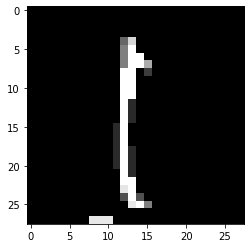

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 

plt.imshow(Images[17], cmap='gray')

In [14]:
Images = Images.reshape(Images.shape[0], 28, 28, 1) 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Images, Labels, test_size=0.2, random_state=42)


In [16]:
from keras.models import load_model
model=load_model('base_model.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.




In [9]:
# from keras.models import Sequential 
# from keras.layers import Dense, Dropout, Activation, Flatten 
# from keras.layers import Conv2D, MaxPooling2D 
# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
# model.add(Conv2D(32, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Flatten())
# model.add(Dense(128, activation='sigmoid'))
# model.add(Dense(10, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
H = model.fit(X_train, y_train,  batch_size=32, epochs=30, verbose=1)

Epoch 1/30
1216/1216 [==============================] - 1s 1ms/step - loss: 1.8508 - accuracy: 0.5995
Epoch 2/30
1216/1216 [==============================] - 0s 174us/step - loss: 1.0643 - accuracy: 0.7270
Epoch 3/30
1216/1216 [==============================] - 0s 176us/step - loss: 0.7631 - accuracy: 0.7771
Epoch 4/30
1216/1216 [==============================] - 0s 177us/step - loss: 0.5473 - accuracy: 0.8306
Epoch 5/30
1216/1216 [==============================] - 0s 179us/step - loss: 0.4487 - accuracy: 0.8610
Epoch 6/30
1216/1216 [==============================] - 0s 180us/step - loss: 0.3713 - accuracy: 0.8882
Epoch 7/30
1216/1216 [==============================] - 0s 173us/step - loss: 0.3125 - accuracy: 0.8972
Epoch 8/30
1216/1216 [==============================] - 0s 173us/step - loss: 0.2526 - accuracy: 0.9178
Epoch 9/30
1216/1216 [==============================] - 0s 176us/step - loss: 0.2143 - accuracy: 0.9235
Epoch 10/30
1216/1216 [==============================] - 0s 177us/

In [19]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test loss: %.4f'% score[0])
print('Test accuracy %.4f'% score[1])

Test loss: 0.1578
Test accuracy 0.9572


In [20]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk
